In [1]:
from matplotlib.colors import LinearSegmentedColormap

import matplotlib.pyplot as plt
import numpy as np

# Full parula colormap data (64 RGB points, normalized to [0, 1])
parula_map_data = np.array([
    [0.2081, 0.1663, 0.5292],
    [0.2116, 0.1898, 0.5777],
    [0.2123, 0.2138, 0.6270],
    [0.2081, 0.2386, 0.6771],
    [0.1959, 0.2645, 0.7279],
    [0.1707, 0.2919, 0.7792],
    [0.1253, 0.3242, 0.8303],
    [0.0591, 0.3598, 0.8683],
    [0.0117, 0.3875, 0.8820],
    [0.0060, 0.4086, 0.8828],
    [0.0165, 0.4266, 0.8786],
    [0.0329, 0.4430, 0.8720],
    [0.0498, 0.4586, 0.8641],
    [0.0629, 0.4737, 0.8554],
    [0.0723, 0.4887, 0.8467],
    [0.0779, 0.5040, 0.8384],
    [0.0793, 0.5200, 0.8312],
    [0.0749, 0.5375, 0.8263],
    [0.0641, 0.5570, 0.8240],
    [0.0488, 0.5772, 0.8228],
    [0.0343, 0.5966, 0.8199],
    [0.0265, 0.6137, 0.8135],
    [0.0239, 0.6287, 0.8038],
    [0.0231, 0.6418, 0.7913],
    [0.0228, 0.6535, 0.7768],
    [0.0267, 0.6642, 0.7607],
    [0.0384, 0.6743, 0.7436],
    [0.0590, 0.6838, 0.7254],
    [0.0843, 0.6928, 0.7062],
    [0.1133, 0.7015, 0.6859],
    [0.1453, 0.7098, 0.6646],
    [0.1801, 0.7177, 0.6424],
    [0.2178, 0.7250, 0.6193],
    [0.2586, 0.7317, 0.5954],
    [0.3022, 0.7376, 0.5712],
    [0.3482, 0.7424, 0.5473],
    [0.3953, 0.7459, 0.5244],
    [0.4420, 0.7481, 0.5033],
    [0.4871, 0.7491, 0.4840],
    [0.5300, 0.7491, 0.4661],
    [0.5709, 0.7485, 0.4494],
    [0.6099, 0.7473, 0.4337],
    [0.6473, 0.7456, 0.4188],
    [0.6834, 0.7435, 0.4044],
    [0.7184, 0.7411, 0.3905],
    [0.7525, 0.7384, 0.3768],
    [0.7858, 0.7356, 0.3633],
    [0.8185, 0.7327, 0.3498],
    [0.8507, 0.7299, 0.3360],
    [0.8824, 0.7274, 0.3217],
    [0.9139, 0.7258, 0.3063],
    [0.9450, 0.7261, 0.2886],
    [0.9739, 0.7314, 0.2666],
    [0.9938, 0.7455, 0.2403],
    [0.9990, 0.7653, 0.2164],
    [0.9955, 0.7861, 0.1967],
    [0.9880, 0.8066, 0.1794],
    [0.9789, 0.8271, 0.1633],
    [0.9697, 0.8481, 0.1475],
    [0.9626, 0.8705, 0.1309],
    [0.9589, 0.8949, 0.1132],
    [0.9598, 0.9218, 0.0948],
    [0.9661, 0.9514, 0.0755],
    [0.9763, 0.9831, 0.0538]
])

# Create colormap
parula_map = LinearSegmentedColormap.from_list("parula", parula_map_data)

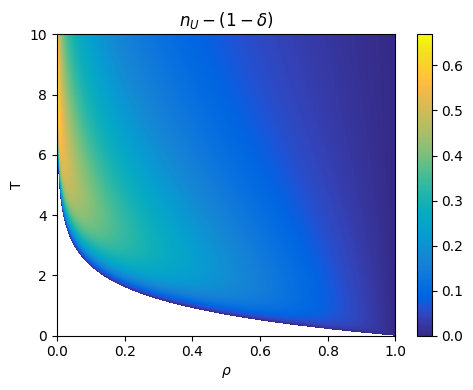

In [2]:
# Define the function
def f(rho, T):
    with np.errstate(divide='ignore', invalid='ignore'):
        term1 = 1 / (rho + (1 - rho) / (1 - np.exp(-T * (1 + np.log(rho)/T))))
        term2 = 1 + np.log(rho) / T
        result = term1 - term2
        result[np.isnan(result)] = np.nan  # Replace NaNs with nan
    return result

# Grid for rho and T
rho_vals = np.linspace(0.000001, 1, 5000)
T_vals = np.linspace(0.000001, 10, 5000)
RHO, T = np.meshgrid(rho_vals, T_vals)

# Apply region condition: rho > 0.0000001 and T >= -log(rho)
region_mask = T >= -np.log(RHO)
Z = np.full_like(RHO, np.nan)
Z[region_mask] = f(RHO[region_mask], T[region_mask])

# Plot
plt.figure(figsize=(5,4))
c = plt.pcolormesh(RHO, T, Z, shading='auto', cmap=parula_map, vmin=0, vmax=np.max(Z[region_mask]), rasterized=True)
plt.xlabel(r'$\rho$')
plt.ylabel('T')
plt.title('$n_U-(1-\delta)$')
plt.colorbar(c)
plt.tight_layout()

plt.savefig("density_plot.pdf", format="pdf", bbox_inches="tight")
plt.show()

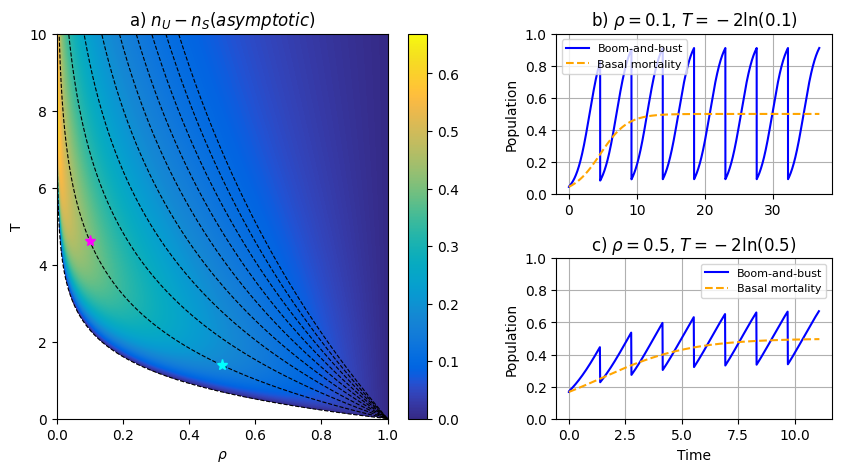

In [5]:
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import gridspec

def f(rho, T):
    with np.errstate(divide='ignore', invalid='ignore'):
        term1 = 1 / (rho + (1 - rho) / (1 - np.exp(-T * (1 + np.log(rho)/T))))
        term2 = 1 + np.log(rho) / T
        result = (term1 - term2)
        result[np.isnan(result)] = np.nan
    return result

rho_vals = np.linspace(0.000001, 1, 5000)
T_vals = np.linspace(0.000001, 10, 5000)
RHO, T = np.meshgrid(rho_vals, T_vals)
region_mask = T >= -np.log(RHO)
Z = np.full_like(RHO, np.nan)
Z[region_mask] = f(RHO[region_mask], T[region_mask])

fig = plt.figure(figsize=(10, 5))
gs = gridspec.GridSpec(1, 2, width_ratios=[1.2, 0.8], wspace=0.25)

ax0 = fig.add_subplot(gs[0])
mesh = ax0.pcolormesh(RHO, T, Z, shading='auto', cmap=parula_map,
                      vmin=0, vmax=np.nanmax(Z), rasterized=True)

# add contour lines
c_values = list(range(1, 11))
rho_line = np.linspace(1e-6, 1, 1000)
for c in c_values:
    T_line = -c * np.log(rho_line)
    valid = (T_line >= 0) & (T_line <= 10)
    ax0.plot(rho_line[valid], T_line[valid], '--k', linewidth=0.8)

rho1, T1 = 0.1, -2 * np.log(0.1)
rho2, T2 = 0.5, -2 * np.log(0.5)

# add markers
ax0.plot(0.1, -2 * np.log(0.1), '*', color='magenta', markersize=8)
ax0.plot(rho2, T2, '*', color='cyan', markersize=8)

ax0.set_xlabel(r'$\rho$')
ax0.set_ylabel('T')
ax0.set_xlim(0, 1)
ax0.set_ylim(0, 10)
fig.colorbar(mesh, ax=ax0)
ax0.set_title("a) $n_U-n_S (asymptotic)$")

gs_right = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=gs[1], hspace=0.4)

def simulate_dynamics(rho, T_pulse, n_steps=8, dt=0.025):
    t_vals, n_vals = [0], []
    n_S = rho / (rho + (1 - rho) / (1 - np.exp(-T_pulse * (1 + np.log(rho)/T_pulse))))
    n = n_S / 2
    n_vals.append(n)

    t = 0
    while t < T_pulse * n_steps:
        t_cycle = np.arange(t, t + T_pulse, dt)
        for t_step in t_cycle:
            n += dt * n * (1 - n)
            t_vals.append(t_step)
            n_vals.append(n)
        n *= rho  # dilution
        t += T_pulse

    # continuous dilution
    t_vals_c, n_vals_c = [0], [n_S / 2]
    n = n_S / 2
    for t in np.arange(0, T_pulse * n_steps, dt):
        n += dt * n * (1 - n + np.log(rho) / T_pulse)
        t_vals_c.append(t + dt)
        n_vals_c.append(n)

    return t_vals, n_vals, t_vals_c, n_vals_c, n_S

ax1 = fig.add_subplot(gs_right[0])
t1, n1, t1c, n1c, nS1 = simulate_dynamics(rho1, T1)

ax1.plot(t1, n1, label='Boom-and-bust', color='blue')
ax1.plot(t1c, n1c, label='Basal mortality', color='orange', linestyle='--')
ax1.set_ylim(0, 1)
ax1.set_ylabel('Population')
ax1.set_title(r"b) $\rho = 0.1$, $T = -2\ln(0.1)$")
ax1.legend(fontsize=8)
ax1.grid(True)

ax2 = fig.add_subplot(gs_right[1])
t2, n2, t2c, n2c, nS2 = simulate_dynamics(rho2, T2)

ax2.plot(t2, n2, label='Boom-and-bust', color='blue')
ax2.plot(t2c, n2c, label='Basal mortality', color='orange', linestyle='--')
ax2.set_ylim(0, 1)
ax2.set_xlabel('Time')
ax2.set_ylabel('Population')
ax2.set_title(r"c) $\rho = 0.5$, $T = -2\ln(0.5)$")
ax2.legend(fontsize=8)
ax2.grid(True)

plt.savefig("density_plot_with_contours.pdf", bbox_inches='tight')
plt.show()